# Pre Processing

In [22]:
import xarray as xr
tem = xr.open_dataset("download.nc")
prec = xr.open_dataset("download1.nc")
soil = xr.open_dataset("download2.nc")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Increase resolution

In [18]:
t=tem['t2m'].isel(time=0)
t.shape

(1801, 3600)

In [45]:
tem.latitude[0]

<xarray.DataArray 'latitude' ()>
array(90., dtype=float32)
Coordinates:
    latitude  float32 90.0
Attributes:
    units:      degrees_north
    long_name:  latitude

In [1]:
#Upscaling to increase the resolution
#This requires a lot of memory and computation
#lat2 = np.linspace(tem.latitude[0],tem.latitude[-1],tem.dims['latitude']*2)
#lon2 = np.linspace(tem.longitude[0],tem.longitude[-1],tem.dims['longitude']*2)
#tem2 = tem.interp(latitude=lat2, longitude=lon2)

# Handling Skew

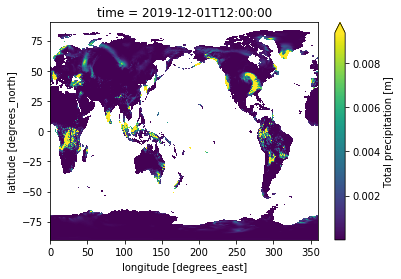

In [30]:
prec['tp'].isel(time=0).plot(robust=True)

In [11]:
prec.mean()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tp       float32 0.00069311797

In [12]:
#We are using logarithmic transformation to remove the negative skew
#The logs don't work when data is 0 or negative, hence we add 1
def trans(data,arg):
  return (np.log(data+1-arg))

In [15]:
prec=prec.pipe(trans,prec.min())

In [16]:
#The minimum value is 0 in logarithmic transformation
prec.min()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tp       float64 0.0

In [17]:
prec.max()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tp       float64 0.1806

In [18]:
prec.mean()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tp       float64 0.0006862